# Assignment2

# Describe

We chose "Monitoring BBC podcasts" as our dataset. There are three datasets in "Monitoring BBC podcasts", one is about word timings which describes information of "start time","end time" as well as "word confidence" of each word. Another one is about "transcripts with punctuation and sentence level timings". This dataset shows the time of a sentence and also provide the number of the word in each sentence, also the "speakerId"(the id of speaker) and "summary prob"(the probability that this sentence will appear in an extractive summary) as well as other information in this sentence. The third one is related to the name of place which be hightlighted.

The link of the data that I used in this assignment is http://data.cstr.ed.ac.uk/globalvox/extsumm/

In this assignment, I will focus on the second dataset which is about the sentences timing and different speakers and the data is in JSON format.

1.data type: It's the Json format and I will convert it into dataFrame and it will be tabular and textual.

First step, import JSON files.

In [1]:
import pandas as pd
import numpy as np
import urllib.request
import ijson
import itertools
import requests
import bs4
import re

There are two folders in this dataset one is for 2016 and another one is for 2017.
Here get all urls in folder 2016.

In [2]:
root_url = 'http://data.cstr.ed.ac.uk/globalvox/extsumm/2016/'
index_url = root_url + '?C=N;O=D'
def getUrls():
    response = requests.get(index_url)
    soup = bs4.BeautifulSoup(response.text, "lxml")
    return [a.attrs.get('href') for a in soup.select('[href^=2016]')]

urls = []
for item in getUrls():
    urls.append(root_url + item)
urls

['http://data.cstr.ed.ac.uk/globalvox/extsumm/2016/20161231220000newshour.extsumm.asrsent.json',
 'http://data.cstr.ed.ac.uk/globalvox/extsumm/2016/20161231181500sixoclocknews.extsumm.asrsent.json',
 'http://data.cstr.ed.ac.uk/globalvox/extsumm/2016/20161231140000newshour.extsumm.asrsent.json',
 'http://data.cstr.ed.ac.uk/globalvox/extsumm/2016/20161231053000theworldthisweek.extsumm.asrsent.json',
 'http://data.cstr.ed.ac.uk/globalvox/extsumm/2016/20161231000700globalnewspodcast.extsumm.asrsent.json',
 'http://data.cstr.ed.ac.uk/globalvox/extsumm/2016/20161230235300worldbusinessreport.extsumm.asrsent.json',
 'http://data.cstr.ed.ac.uk/globalvox/extsumm/2016/20161230220000newshour.extsumm.asrsent.json',
 'http://data.cstr.ed.ac.uk/globalvox/extsumm/2016/20161230181500sixoclocknews.extsumm.asrsent.json',
 'http://data.cstr.ed.ac.uk/globalvox/extsumm/2016/20161230181000worldbusinessreport.extsumm.asrsent.json',
 'http://data.cstr.ed.ac.uk/globalvox/extsumm/2016/20161230153800globalnewspod

Find all JSON files on June 23rd which is the day related to "Vote Leave" and print their indexs.

In [3]:
print ("[", urls.index("http://data.cstr.ed.ac.uk/globalvox/extsumm/2016/20160623232600globalnewspodcast.extsumm.asrsent.json"),":",
       urls.index("http://data.cstr.ed.ac.uk/globalvox/extsumm/2016/20160623060300bestoftoday.extsumm.asrsent.json") + 1,"]")

[ 1943 : 1955 ]


In [4]:
########input these indexs and merge these files into one dataFrame###########

speakerInfo = []
for item in urls[1943:1955]:      
    f = urllib.request.urlopen(item)
    objects = ijson.items(f, "segments.item")
    segments = list (objects)
    
    for num in range(len(segments)):
        speakerInfo.append(segments[num])
        
speakerInfo
 

[{'SummaryProb': Decimal('0.0222'),
  'classId': 'transcript',
  'conv': '20160623232600globalnewspodcast',
  'endTime': Decimal('13.79'),
  'nwords': 20,
  'sid': '20160623232600globalnewspodcast.s0001.sentence.1',
  'speakerId': 's0001',
  'startTime': Decimal('7.57'),
  'trans': 'This is the B.B.C., the details of our complete range of programs, go to the P.C. world service dot com.'},
 {'SummaryProb': Decimal('0.0051'),
  'classId': 'transcript',
  'conv': '20160623232600globalnewspodcast',
  'endTime': Decimal('15.84'),
  'nwords': 3,
  'sid': '20160623232600globalnewspodcast.s0001.sentence.2',
  'speakerId': 's0001',
  'startTime': Decimal('14.47'),
  'trans': "What's rush podcasts."},
 {'SummaryProb': Decimal('0.0499'),
  'classId': 'transcript',
  'conv': '20160623232600globalnewspodcast',
  'endTime': Decimal('24.94'),
  'nwords': 19,
  'sid': '20160623232600globalnewspodcast.s0001.sentence.3',
  'speakerId': 's0001',
  'startTime': Decimal('18.7'),
  'trans': 'Welcome to the 

In [5]:
cols = list(speakerInfo[0].keys())
rows = []
indices = []
for index, d in enumerate(speakerInfo):
    indices.append(index)
    values = []
    for col in cols:
        values.append(d[col])
    rows.append(values)
#df1 is the dataFrame of June 23rd
df1 = pd.DataFrame(rows, index = indices, columns = cols)
df1.convert_objects(convert_numeric=True)
df1

/Users/sunyiwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if sys.path[0] == '':


,classId,speakerId,conv,sid,nwords,startTime,endTime,SummaryProb,trans
0,transcript,s0001,20160623232600globalnewspodcast,20160623232600globalnewspodcast.s0001.sentence.1,20,7.57,13.79,0.0222,"This is the B.B.C., the details of our complet..."
1,transcript,s0001,20160623232600globalnewspodcast,20160623232600globalnewspodcast.s0001.sentence.2,3,14.47,15.84,0.0051,What's rush podcasts.
2,transcript,s0001,20160623232600globalnewspodcast,20160623232600globalnewspodcast.s0001.sentence.3,19,18.7,24.94,0.0499,Welcome to the latest global news compiled sho...
3,transcript,s0001,20160623232600globalnewspodcast,20160623232600globalnewspodcast.s0001.sentence.4,18,25.28,31.12,0.0516,This is entry page with a selection of highlig...
4,transcript,s0001,20160623232600globalnewspodcast,20160623232600globalnewspodcast.s0001.sentence.5,27,31.12,39.77,0.074,Britain has made its choice posing in the refe...
5,transcript,s0001,20160623232600globalnewspodcast,20160623232600globalnewspodcast.s0001.sentence.6,19,40.24,46.75,0.028,"Andrew, it's been a hard fought campaign to tr..."
6,transcript,s0001,20160623232600globalnewspodcast,20160623232600globalnewspodcast.s0001.sentence.7,31,47.05,58.38,0.057,What sorts of relationship does the U.K. wants...
7,transcript,s0001,20160623232600globalnewspodcast,20160623232600globalnewspodcast.s0001.sentence.8,66,58.41,76.96,0.3416,More than a correspondent robots non the way s...
8,transcript,s0001,20160623232600globalnewspodcast,20160623232600globalnewspodcast.s0001.sentence.9,15,76.96,81.76,0.0115,"That, in my own area, we turn out in Council e..."
9,transcript,s0001,20160623232600globalnewspodcast,20160623232600globalnewspodcast.s0001.sentence.10,10,81.9,83.93,0.0102,"I mean, I fought, you know, I've been in polit..."


In [6]:
#clean df1
del df1['classId']
del df1['conv']
del df1['sid']
del df1['SummaryProb']
del df1['trans']
df1

,speakerId,nwords,startTime,endTime
0,s0001,20,7.57,13.79
1,s0001,3,14.47,15.84
2,s0001,19,18.7,24.94
3,s0001,18,25.28,31.12
4,s0001,27,31.12,39.77
5,s0001,19,40.24,46.75
6,s0001,31,47.05,58.38
7,s0001,66,58.41,76.96
8,s0001,15,76.96,81.76
9,s0001,10,81.9,83.93


In [7]:
#calculate in sentence level the average time for different speakers speak out a word
df1['time']=df1['endTime']-df1['startTime']
df1['average_time']=df1['time']/df1['nwords']
df1

,speakerId,nwords,startTime,endTime,time,average_time
0,s0001,20,7.57,13.79,6.22,0.311
1,s0001,3,14.47,15.84,1.37,0.4566666666666666666666666667
2,s0001,19,18.7,24.94,6.24,0.3284210526315789473684210526
3,s0001,18,25.28,31.12,5.84,0.3244444444444444444444444444
4,s0001,27,31.12,39.77,8.65,0.3203703703703703703703703704
5,s0001,19,40.24,46.75,6.51,0.3426315789473684210526315789
6,s0001,31,47.05,58.38,11.33,0.3654838709677419354838709677
7,s0001,66,58.41,76.96,18.55,0.2810606060606060606060606061
8,s0001,15,76.96,81.76,4.80,0.32
9,s0001,10,81.9,83.93,2.03,0.203


In [8]:
#find out how many different speakers 
df1['speakerId'].value_counts()

s0001    647
s0002    279
s0004    227
s0003    175
s0006    164
s0008     67
s0005     56
s0007     29
s0010     14
s0009      7
Name: speakerId, dtype: int64

Find all JSON files on June 22nd which is the day before "Vote Leave" and all files on June 24th which is the day after "Vote Leave" and  print their indexs.

In [9]:
#Indexs for June 22nd
print ("[", urls.index("http://data.cstr.ed.ac.uk/globalvox/extsumm/2016/20160622230800globalnewspodcast.extsumm.asrsent.json"),":",
       urls.index("http://data.cstr.ed.ac.uk/globalvox/extsumm/2016/20160622003000hardtalk.extsumm.asrsent.json") + 1,"]")
#Indexs for June 24th
print ("[", urls.index("http://data.cstr.ed.ac.uk/globalvox/extsumm/2016/20160624215400newshour.extsumm.asrsent.json"),":",
       urls.index("http://data.cstr.ed.ac.uk/globalvox/extsumm/2016/20160624000600hardtalk.extsumm.asrsent.json") + 1,"]")

[ 1955 : 1966 ]
[ 1932 : 1943 ]


In [10]:
########input these indexs and merge these files into one dataFrame####
#for June 22nd
speakerInfo0 = []
for item in urls[1955:1966]:      
    f = urllib.request.urlopen(item)
    objects = ijson.items(f, "segments.item")
    segments = list (objects)
    
    for num in range(len(segments)):
        speakerInfo0.append(segments[num])
        
#for June 24th
speakerInfo2 = []
for item in urls[1932:1943]:      
    f = urllib.request.urlopen(item)
    objects = ijson.items(f, "segments.item")
    segments = list (objects)
    
    for num in range(len(segments)):
        speakerInfo2.append(segments[num])    
speakerInfo2
 

[{'SummaryProb': Decimal('0.9747'),
  'classId': 'transcript',
  'conv': '20160624215400newshour',
  'endTime': Decimal('56.39'),
  'nwords': 174,
  'sid': '20160624215400newshour.s0003.sentence.1',
  'speakerId': 's0003',
  'startTime': Decimal('3.06'),
  'trans': "Hello and welcome to new South in the B.B.C. world service coming to you line from London, I'm James Camara Sami, and today we devoting the program to what is almost certainly the biggest to shake up of the European order, since the fall of the Berlin wall, Britain, one of the largest members of the European Union has voted to leave the E.U.. after forty three years, and I do the warnings of economic collapse, nor the please on the front pages of European Newspapers persuaded British voters to stick with the project, which they have traditionally been holding at arm's length, and which in recent years that increasingly come to blame for their problems in the end of fifty one point nine percent voted to leave in Thursday's r

In [11]:
#for June 22nd
cols = list(speakerInfo0[0].keys())
rows = []
indices = []
for index, d in enumerate(speakerInfo0):
    indices.append(index)
    values = []
    for col in cols:
        values.append(d[col])
    rows.append(values)
#df0 is the dataFrame of June 22nd
df0 = pd.DataFrame(rows, index = indices, columns = cols)
df0.convert_objects(convert_numeric=True)
#clean df2
del df0['classId']
del df0['conv']
del df0['sid']
del df0['SummaryProb']
del df0['trans']

#calculate in sentence level the average time for different speakers speak out a word
df0['time']=df0['endTime']-df0['startTime']
df0['average_time']=df0['time']/df0['nwords']

#find out how many different speakers
df0['speakerId'].value_counts()

/Users/sunyiwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  del sys.path[0]


s0001    625
s0002    502
s0003    377
s0004    185
s0005    140
s0006     19
Name: speakerId, dtype: int64

In [12]:
#for June 24th
cols = list(speakerInfo2[0].keys())
rows = []
indices = []
for index, d in enumerate(speakerInfo2):
    indices.append(index)
    values = []
    for col in cols:
        values.append(d[col])
    rows.append(values)
    
#df2 is the dataFrame of June 24th
df2 = pd.DataFrame(rows, index = indices, columns = cols)
df2.convert_objects(convert_numeric=True)
#clean df2
del df2['classId']
del df2['conv']
del df2['sid']
del df2['SummaryProb']
del df2['trans']

#calculate in sentence level the average time for different speakers speak out a word
df2['time']=df2['endTime']-df2['startTime']
df2['average_time']=df2['time']/df2['nwords']

#find out how many different speakers
df2['speakerId'].value_counts()


/Users/sunyiwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


s0003    786
s0001    780
s0002    381
s0004    271
s0005    216
s0007    119
s0008     53
s0006     27
Name: speakerId, dtype: int64

Convert these three dataFrames into three new dataFrame which is group by 
"speakerId" and insert a column named "date" and the column "speed" is set up with the mean of average time of different speakers.

After that merge these three new dataFrames into one dataFrame named df_total.

In [13]:
#dataFrame on June 23rd
data1=df1['average_time'].groupby(df1['speakerId']).sum()/df1['speakerId'].value_counts()
df_data1 = pd.DataFrame(data1,columns=['speed'])
df_data1.reset_index(level=0, inplace=True)
df_data1['date']='20160623'
 
#dataFrame on June 22rd
data0=df0['average_time'].groupby(df0['speakerId']).sum()/df0['speakerId'].value_counts()
df_data0 = pd.DataFrame(data0,columns=['speed'])
df_data0.reset_index(level=0, inplace=True)
df_data0['date']='20160622'


#dataFrame on June 24th
data2=df2['average_time'].groupby(df2['speakerId']).sum()/df2['speakerId'].value_counts()
df_data2 = pd.DataFrame(data2,columns=['speed'])
df_data2.reset_index(level=0, inplace=True)
df_data2['date']='20160624'

#merge these three dataFrames into one dataFrame

a = np.array(df_data0)
b = np.array(df_data1)
c = np.array(df_data2)
df_total=np.vstack ((a,b,c))
df_total=pd.DataFrame(df_total,columns=['speakerId','speed','date'])

df_total = df_total.convert_objects(convert_numeric=True)
df_total

/Users/sunyiwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,speakerId,speed,date
0,s0001,0.318703,20160622
1,s0002,0.312464,20160622
2,s0003,0.314043,20160622
3,s0004,0.328404,20160622
4,s0005,0.317327,20160622
5,s0006,0.410816,20160622
6,s0001,0.324682,20160623
7,s0002,0.345549,20160623
8,s0003,0.328529,20160623
9,s0004,0.345791,20160623


2.how large and complex is it?

In [273]:
print ('The row and column of df0 is',df0.shape,'. The size of df0 is',df0.size)
print ('The row and column of df1 is',df1.shape,'. The size of df1 is',df1.size)
print ('The row and column of df2 is',df2.shape,'. The size of df2 is',df2.size)
print ('The row and column of df_total is',df_total.shape,'. The size of df_total is',df_total.size)
 

The row and column of df0 is (1848, 6) . The size of df0 is 11088
The row and column of df1 is (1665, 6) . The size of df1 is 9990
The row and column of df2 is (2633, 6) . The size of df2 is 15798
The row and column of df_total is (24, 3) . The size of df_total is 72


The variables and structure of each dataFrame.

In [274]:
#df0
print ('The variables of df0 is',df0.columns)
df0.head()

The variables of df0 is Index(['speakerId', 'nwords', 'startTime', 'endTime', 'time', 'average_time'], dtype='object')


,speakerId,nwords,startTime,endTime,time,average_time
0,s0003,22,7.59,14.89,7.30,0.3318181818181818181818181818
1,s0002,83,18.39,46.57,28.18,0.3395180722891566265060240964
2,s0001,4,46.78,47.89,1.11,0.2775
3,s0001,6,47.89,49.67,1.78,0.2966666666666666666666666667
4,s0001,17,50.06,55.44,5.38,0.3164705882352941176470588235


In [275]:
#df1
print ('The variables of df1 is',df1.columns)
df1.head()

The variables of df1 is Index(['speakerId', 'nwords', 'startTime', 'endTime', 'time', 'average_time'], dtype='object')


,speakerId,nwords,startTime,endTime,time,average_time
0,s0001,20,7.57,13.79,6.22,0.311
1,s0001,3,14.47,15.84,1.37,0.4566666666666666666666666667
2,s0001,19,18.7,24.94,6.24,0.3284210526315789473684210526
3,s0001,18,25.28,31.12,5.84,0.3244444444444444444444444444
4,s0001,27,31.12,39.77,8.65,0.3203703703703703703703703704


In [276]:
#df2
print ('The variables of df2 is',df2.columns)
df2.head()

The variables of df2 is Index(['speakerId', 'nwords', 'startTime', 'endTime', 'time', 'average_time'], dtype='object')


,speakerId,nwords,startTime,endTime,time,average_time
0,s0003,174,3.06,56.39,53.33,0.3064942528735632183908045977
1,s0003,32,56.56,66.69,10.13,0.3165625
2,s0003,3,66.75,67.32,0.57,0.19
3,s0002,8,68.36,71.2,2.84,0.355
4,s0002,8,71.2,75.22,4.02,0.5025


In [277]:
#df_total
print ('The variables of df_total is',df_total.columns)
df_total.head()

The variables of df_total is Index(['speakerId', 'speed', 'date'], dtype='object')


,speakerId,speed,date
0,s0001,0.318703,20160622
1,s0002,0.312464,20160622
2,s0003,0.314043,20160622
3,s0004,0.328404,20160622
4,s0005,0.317327,20160622


3.What fields and data types are present?

In [278]:
print('The max in average time of df0 is',df0['average_time'].max(),'The min in average time of df0 is',df0['average_time'].min())
print('The max in average time of df1 is',df1['average_time'].max(),'The min in average time of df1 is',df1['average_time'].min())
print('The max in average time of df2 is',df2['average_time'].max(),'The min in average time of df2 is',df2['average_time'].min())
print('The max in speed of df_total is',df_total['speed'].max(),'The min in speed of df_total is',df_total['speed'].min())

The max in average time of df0 is 1.353333333333333333333333333 The min in average time of df0 is 0.134
The max in average time of df1 is 2.255 The min in average time of df1 is 0.1275
The max in average time of df2 is 2.443333333333333333333333333 The min in average time of df2 is 0.1066666666666666666666666667
The max in speed of df_total is 0.422499602588 The min in speed of df_total is 0.269532040712


In [279]:
print('The data types in df0 are',df0.dtypes)
print('The data types in df1 are',df1.dtypes)
print('The data types in df2 are',df2.dtypes)
print('The data types in df_total are',df_total.dtypes)

The data types in df0 are speakerId       object
nwords           int64
startTime       object
endTime         object
time            object
average_time    object
dtype: object
The data types in df1 are speakerId       object
nwords           int64
startTime       object
endTime         object
time            object
average_time    object
dtype: object
The data types in df2 are speakerId       object
nwords           int64
startTime       object
endTime         object
time            object
average_time    object
dtype: object
The data types in df_total are speakerId     object
speed        float64
date           int64
dtype: object


4.Links between this data and other data.

There are three datasets in "Monitoring BBC podcasts" as mentioned before, but there is no foreign keys between them.
As for the dataFrame df0, df1, df2 and df_total. The unique ids are"date" and "speakerId" for all of them and the foreign keys are also "date" and "speakerId".

5.Summary statistics about the data.

In [280]:
print(df_total['speakerId'].value_counts())
print(df_total['date'].value_counts())
print(df_total['speed'].mean())

s0001    3
s0002    3
s0004    3
s0005    3
s0003    3
s0006    3
s0008    2
s0007    2
s0010    1
s0009    1
Name: speakerId, dtype: int64
20160623    10
20160624     8
20160622     6
Name: date, dtype: int64
0.33287033393343396


We can find there are 10 persons in this data. The time range is from 20160622 to 20160624. The average speed is 0.33287033393343396 word/second.

6.How does the data relate to the questions that the data owner has discussed with you?

Actually, there is no compulsive problem to be solved, and in this assignment, I want to discuss the relation between speaking speed, speakerId as well as different dates, even diffrent events. So I get the data about "speakerId", "speed" and "date".

Now we get a new dataFrame which shows the data about different speakers' speaking speed on June 22nd, 23rd, and 24th.


# Explore

Next step, we can try to generate some charts.

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

 

Firstly, I draw a chart which nearly contains all information in the df_total. 

The different colors bars represent different speakers, and the x-axis shows different dates and the y-axis shows the value of speed(the higher the value, the slower the speed).

So in this picture we can find there are 6 speakers on June 22nd and the fastest one is s0002 and the slowest one is s0006, it's over 0.4 second/word. On June 23rd there are 10 speakers and the fastest one is s0007, it's smaller than 0.3 second/word and the slowest one is s0008, it's also over 0.4 second/word. On June 24th, there are 8 speakers and the fastest one is also s0007, the speed is also faster than 0.3 second/word and the slowest one is s0006 and the speed is close to 0.33 second/word.
Most speakers' speaking speed are slower than 0.30 word/second and the fastest speaker is s0007 and his speed is faster than 0.30 word/second.





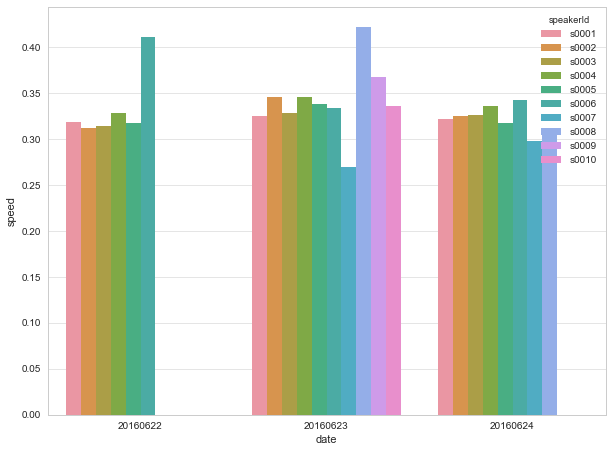

In [282]:
fig, ax = plt.subplots(figsize=(10,7.5))
sns.set(style='whitegrid', rc={"grid.linewidth": 0.5})
sns.set_context( font_scale=1.5)
chart1=sns.barplot(x='date',y='speed',hue='speakerId',data=df_total,ci=0)

Secondly, I draw a box chart. It shows the median values and means and some "abnormal value"(Here I'm not sure that is it abnormal or not). From this chart through analyzing the median and mean we can found on June 23rd, the speed is slower than the speed on June 22nd and June 24th.

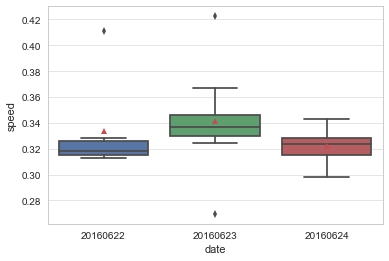

In [283]:
chart2=sns.boxplot(x=df_total['date'],y=df_total['speed'],showmeans=True)

Thirdly, I draw a distribution diagram which shows how speeds of s0001-s0006(because s0001-s0006 appeared in all three days.) distribute in these three days.

From this chart, we can find that the range of speeds of s0001 is the smallest and the range of speeds of s0006 is the largest. As for the range of s0003, s0004 and s0005 is relatively moderate and s0002 is a little large.

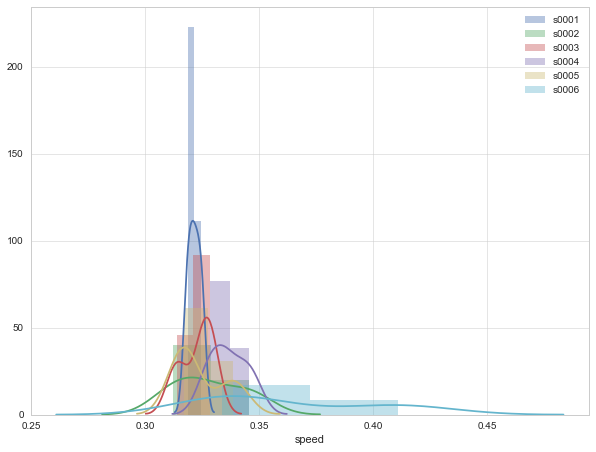

In [284]:
fig, ax = plt.subplots(figsize=(10,7.5))
sns.set(style='whitegrid', rc={"grid.linewidth": 0.5})
sns.set_context( font_scale=1.5) 
chart3 = sns.distplot(df_total[df_total['speakerId']=='s0001']['speed'],label='s0001')
chart3 = sns.distplot(df_total[df_total['speakerId']=='s0002']['speed'],label='s0002')
chart3 = sns.distplot(df_total[df_total['speakerId']=='s0003']['speed'],label='s0003')
chart3 = sns.distplot(df_total[df_total['speakerId']=='s0004']['speed'],label='s0004')
chart3 = sns.distplot(df_total[df_total['speakerId']=='s0005']['speed'],label='s0005')
chart3 = sns.distplot(df_total[df_total['speakerId']=='s0006']['speed'],label='s0006')
chart3.legend()

Next I draw a bar chart. The different colors bars represent different dates, and the x-axis shows different speakers and the y-axis shows the value of speed(the higher the value, the slower the speed).

From this chart, we can find that most speakers(s0001, s0002, s0003, s0004, s0005, s0007) spoke slowly on June 23rd. s0006 and s0008 speak faster on June 23rd.

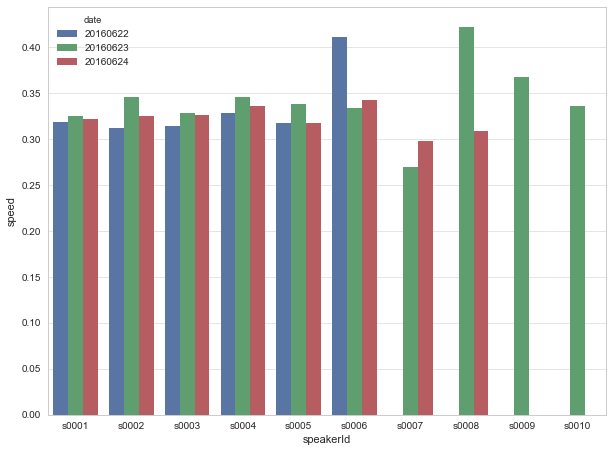

In [285]:
fig, ax = plt.subplots(figsize=(10,7.5))
sns.set(style='whitegrid', rc={"grid.linewidth": 0.5})
sns.set_context( font_scale=1.5)
chart4=sns.barplot(x='speakerId',y='speed',hue='date',data=df_total,ci=0)

The relation between date and speed is on June 23rd, the speaking speed is slower than on the other two days. And the relation between speaker number and speed is the more the speaker, the slower the speed. From chart1 and chart2 we can find that on 23rd there are 10 people and on the 24th there are 8 people as well as on the 22nd there are only 6 people. And the speed on 23rd is slower than that on 24th and the speed on 24th is slower than that on 22nd.

As for the trend, I think maybe on some events or some important day, the speaker will speak slowly. I think the more important relation is the date and speed. Maybe when you find the speaker speak slowly, there are something important thing happened on that day.

# Reflect and Hypothesise

I find that most speakers' speaking speed are between 0.30-0.35(from chart 1) and totally speakers speak slower on June 23rd(from chart2). From chart3 and chart4 I find that most speakers speak slower on June 23rd and most of them have little speed ranges. From chart1 and chart2 it also can be found that the fewer the people the faster the speed. And the date data can be related to an event date in real life, it is "Brexit vote". It is an importent event in real life. 

So the hypothesise1 is when there are some important thing happening, the speakers will speak slowly. From chart2 it can be found the speakers spoke slower on June 23rd and spoke faster on June 22nd and 24th. I think this is because the speakers are more cautious on special days and they need to ensure they read every word  correct and maybe they seldom broadcast such content so they are not familiar with that. 

The hypothesise2 is the more speakers the slower the speed. From chart1 and chart2 we can find that on 23rd there are 10 people and on the 24th there are 8 people as well as on the 22nd there are only 6 people. And the speed on 23rd is slower than that on 24th and the speed on 24th is slower than that on 22nd. The hypothesise3 is that BBC likes using the speaker who has steady speaking speed. From chart3 and chart4 we can find that most of the speakers have a steady speaking speed. So combined hypothesise2 and hypothesise3, I think the reason is the speaker who has a steady speaking speed represent who has skillful broadcast skills so this kind of speakers have more opportunities and they can work almost everyday and the work experience also make them be familiar with their job. So when the new speakers join in the speaking speed will slow down.  

The hypothesise4 is that when some important thing appear, there will be more speakers. This also can be found from chart1. I think that is because there are more content need to be reported, so they need more people to finish it on time or report more information.  